##### Dataset complete info: https://archive.ics.uci.edu/ml/datasets/car+evaluation

## Attribute information

* Class Values:

    unacc, acc, good, vgood

* Attributes:

    1. buying: vhigh, high, med, low.
    2. maint: vhigh, high, med, low.
    3. doors: 2, 3, 4, 5more.
    4. persons: 2, 4, more.
    5. lug_boot: small, med, big.
    6. safety: low, med, high.



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import plot_tree
%matplotlib inline


In [2]:
car_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

In [3]:
pd.read_csv(car_data, header=None)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
columns = ["buying","maint", "doors", "persons", "lug_boot","safety", "class values"]

In [5]:
data = pd.read_csv(car_data, names=columns)
data[:3]

,buying,maint,doors,persons,lug_boot,safety,class values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc


In [6]:
data.dtypes

buying          object
maint           object
doors           object
persons         object
lug_boot        object
safety          object
class values    object
dtype: object

In [7]:
data = data.replace({'vhigh': 4, 'high': 3, 'med': 2, 'low': 1})
data = data.replace({'small': 1, 'big': 3})
data = data.replace({'5more': 5, 'more': 5, '2': 2, '3': 3, '4': 4})
data['class values'] = data['class values'].map({'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3})

In [8]:
data[:3]

,buying,maint,doors,persons,lug_boot,safety,class values
0,4,4,2,2,1,1,0
1,4,4,2,2,1,2,0
2,4,4,2,2,1,3,0


In [9]:
data.dtypes

buying          int64
maint           int64
doors           int64
persons         int64
lug_boot        int64
safety          int64
class values    int64
dtype: object

## Get Target and Features

In [10]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [11]:
print(X.shape)
X[:3]

(1728, 6)


,buying,maint,doors,persons,lug_boot,safety
0,4,4,2,2,1,1
1,4,4,2,2,1,2
2,4,4,2,2,1,3


In [12]:
print(y.shape)
y[:3]

(1728,)


0    0
1    0
2    0
Name: class values, dtype: int64

## Full data in Histogram plot

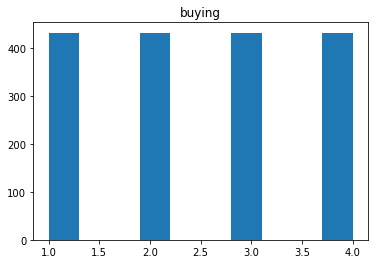

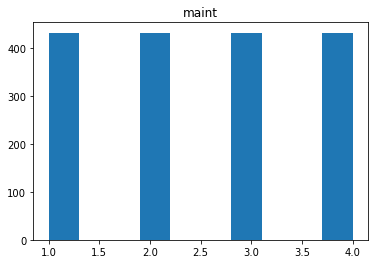

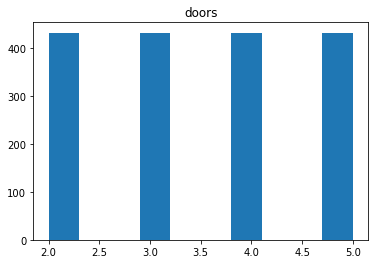

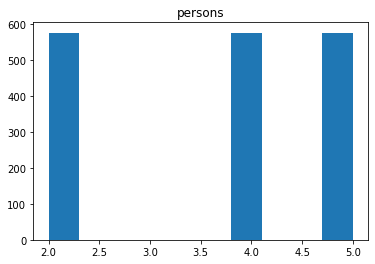

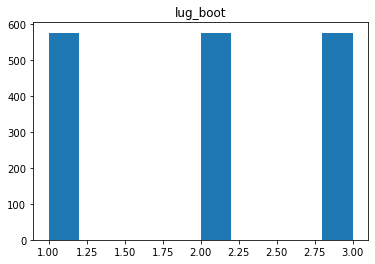

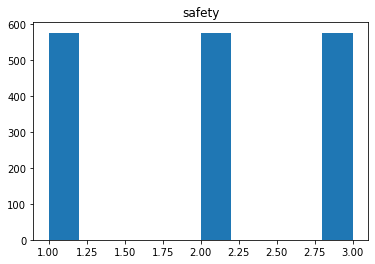

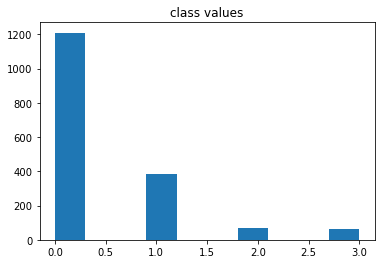

In [13]:
for col_name in data.columns:
        plt.figure()
        plt.hist(data[col_name])
        plt.title(col_name)

## Split and Decision Tree 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [15]:
print(X_train.shape)
print(X_train[:3])
print(y_train.shape)
print(X_test[:3])
print(X_test.shape)
print(y_train[:3])
print(y_test.shape)
print(y_test[:3])

(1209, 6)
      buying  maint  doors  persons  lug_boot  safety
1178       2      2      5        4         3       3
585        3      3      3        5         1       1
1552       1      2      3        4         2       2
(1209,)
      buying  maint  doors  persons  lug_boot  safety
599        3      3      4        2         2       3
1201       2      1      2        4         2       2
628        3      3      5        2         3       2
(519, 6)
1178    3
585     0
1552    1
Name: class values, dtype: int64
(519,)
599     0
1201    1
628     0
Name: class values, dtype: int64


In [16]:
dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_clf_fit = dt_clf.fit(X_train, y_train)
dt_clf_fit

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
# checking  max features
dt_clf.max_features_

6

In [18]:
# checking classes
dt_clf.classes_

array([0, 1, 2, 3], dtype=int64)

In [19]:
# checking tree
dt_clf.tree_

[Text(0.6154661016949152, 0.9615384615384616, 'safety <= 1.5\nentropy = 1.192\nsamples = 1209\nvalue = [852, 266, 50, 41]\nclass = unacc'),
 Text(0.5985169491525424, 0.8846153846153846, 'entropy = 0.0\nsamples = 407\nvalue = [407, 0, 0, 0]\nclass = unacc'),
 Text(0.6324152542372882, 0.8846153846153846, 'persons <= 3.0\nentropy = 1.469\nsamples = 802\nvalue = [445, 266, 50, 41]\nclass = unacc'),
 Text(0.6154661016949152, 0.8076923076923077, 'entropy = 0.0\nsamples = 260\nvalue = [260, 0, 0, 0]\nclass = unacc'),
 Text(0.649364406779661, 0.8076923076923077, 'buying <= 2.5\nentropy = 1.632\nsamples = 542\nvalue = [185, 266, 50, 41]\nclass = acc'),
 Text(0.4088983050847458, 0.7307692307692307, 'maint <= 2.5\nentropy = 1.74\nsamples = 264\nvalue = [34, 139, 50, 41]\nclass = acc'),
 Text(0.211864406779661, 0.6538461538461539, 'safety <= 2.5\nentropy = 1.778\nsamples = 129\nvalue = [7, 41, 50, 31]\nclass = good'),
 Text(0.09322033898305085, 0.5769230769230769, 'lug_boot <= 1.5\nentropy = 1.2\n

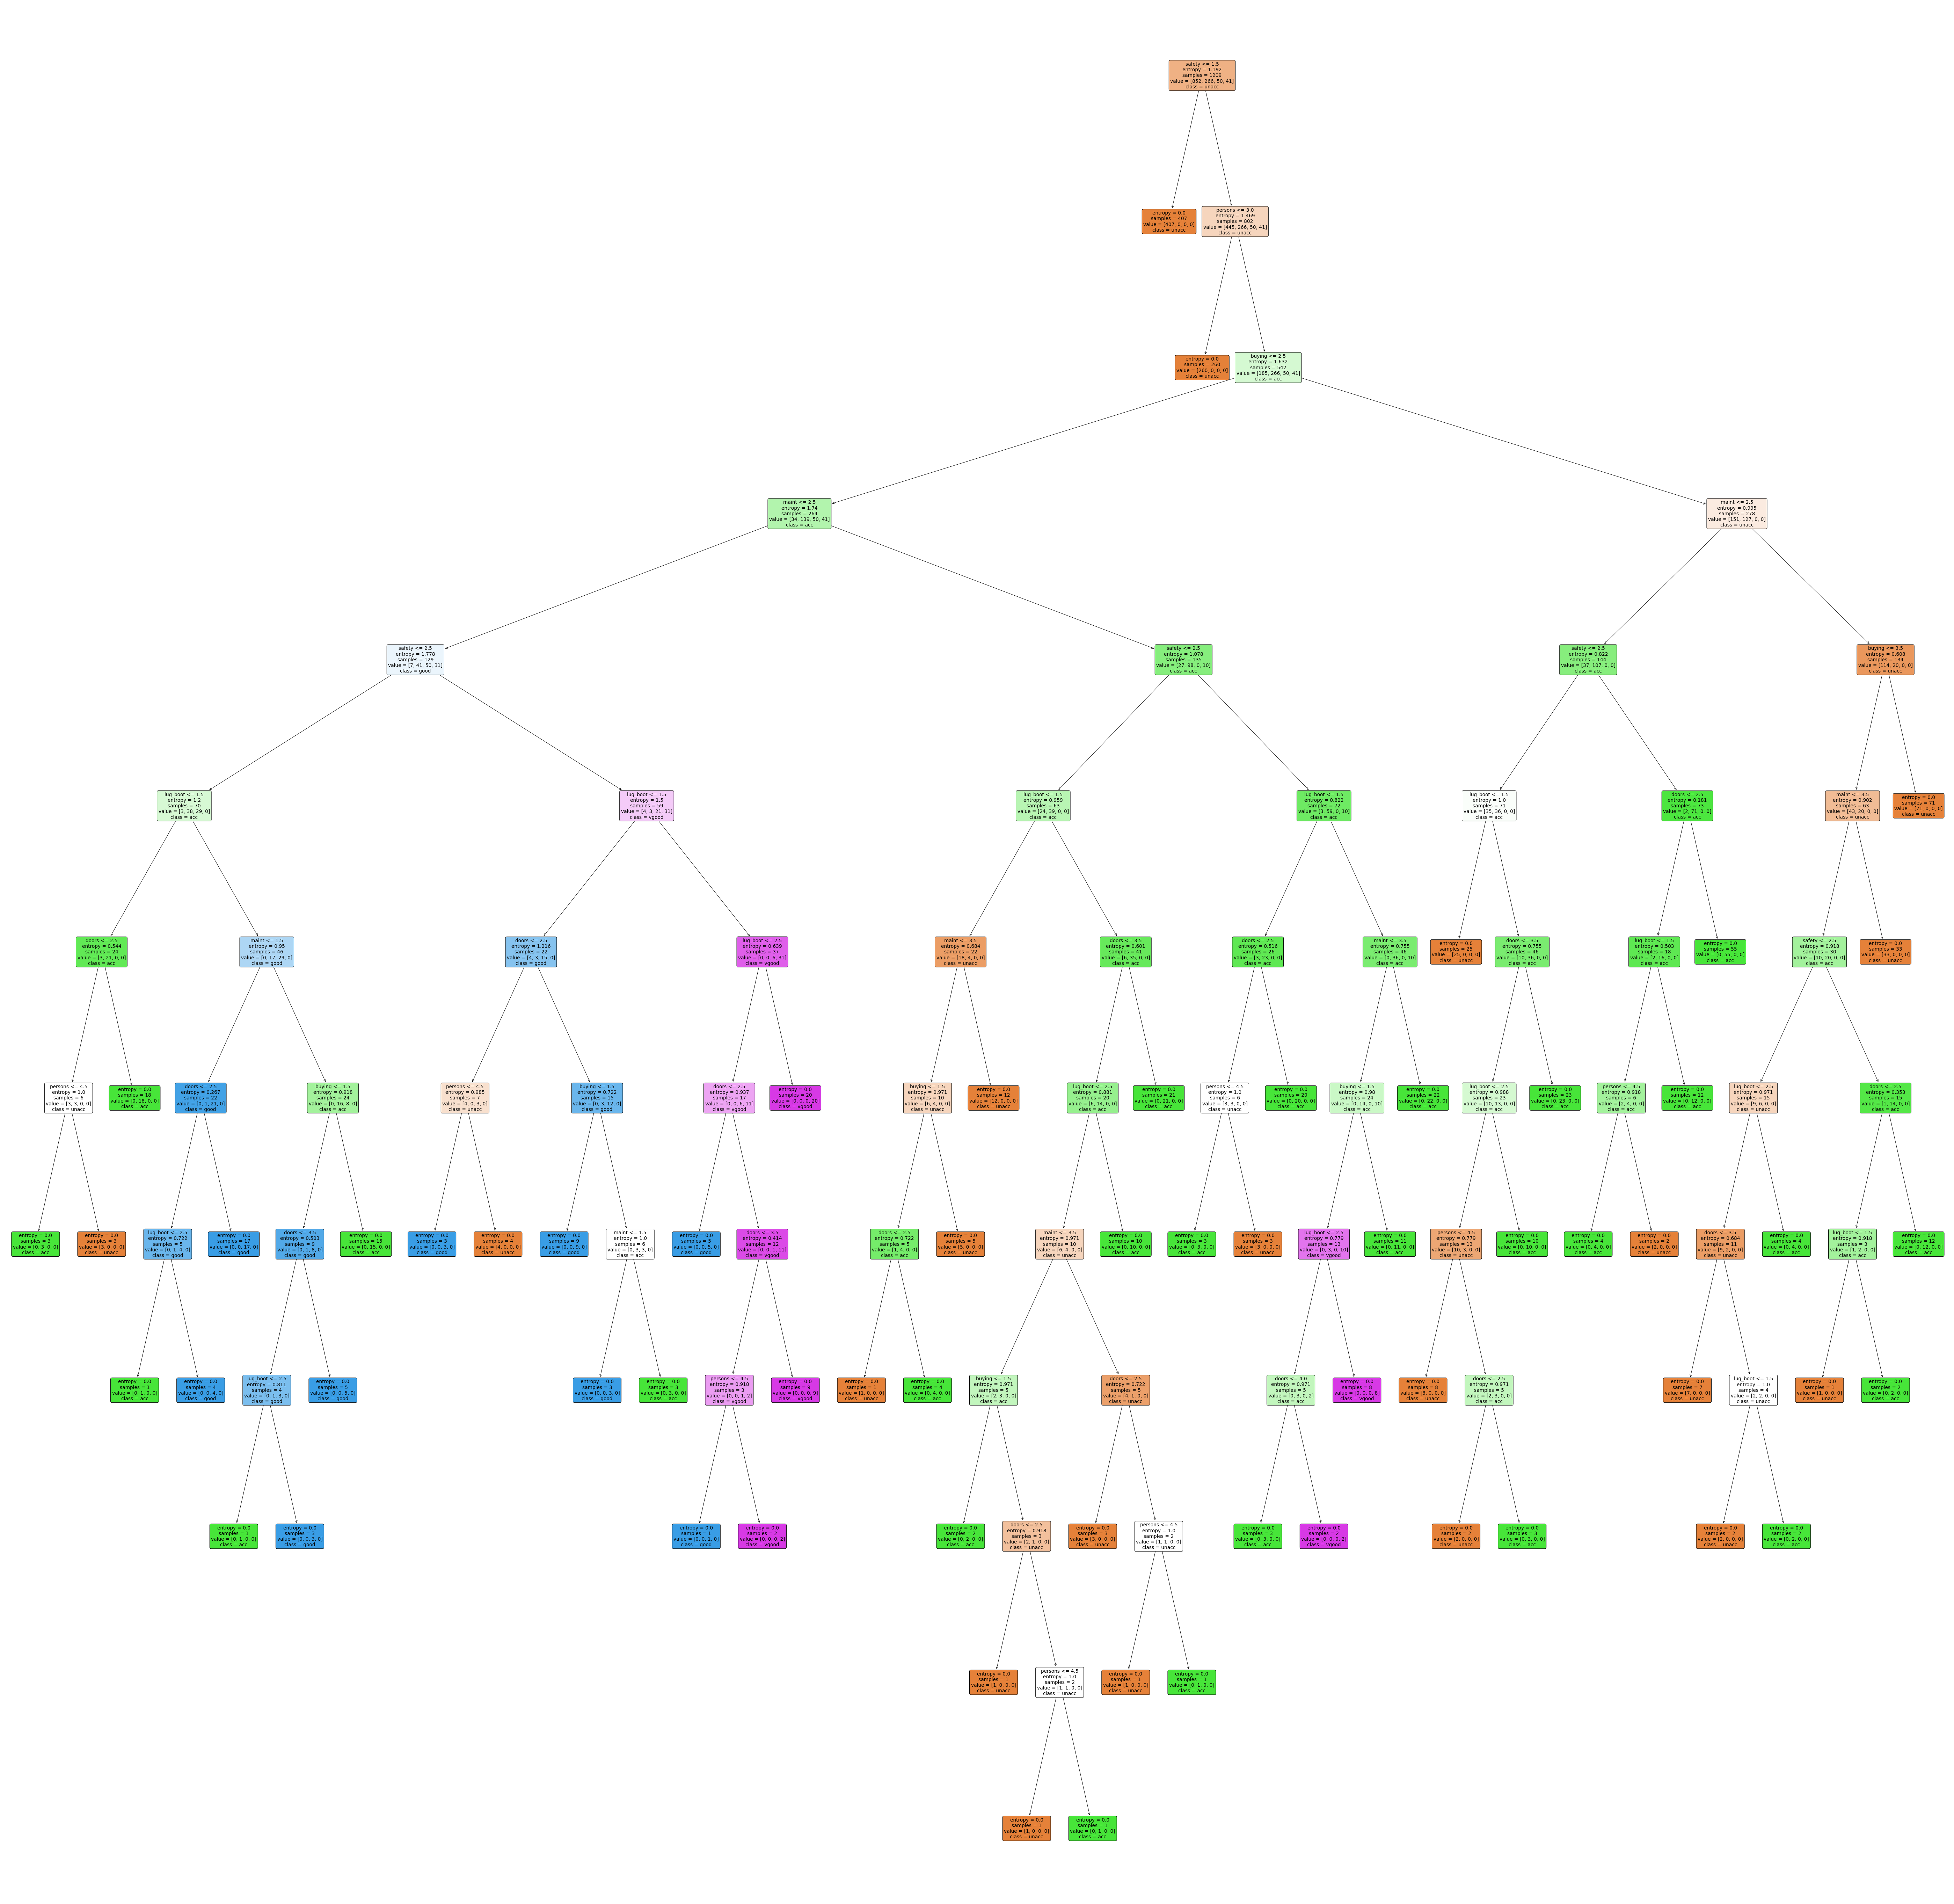

In [20]:
# plotting the decision tree
plt.figure(figsize=(100, 100))
plot_tree(dt_clf,
          filled=True,
          rounded=True,
          impurity=True,
          class_names=['unacc', 'acc', 'good', 'vgood'],
         feature_names=X.columns)

## Confusion Matrix

C:\Users\ritth\software\anaconda\envs\strive\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


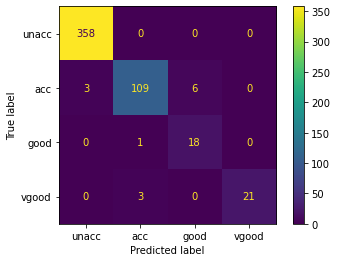

In [21]:
plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=['unacc', 'acc', 'good', 'vgood'])

## Predictting and checking 

In [22]:
# Predicting the test set result  
y_pred = dt_clf.predict(X_test)
print(y_pred[:3])
print(y_pred.shape)

[0 1 0]
(519,)


In [23]:
# Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix   
cm = confusion_matrix(y_test, y_pred)  
cm

array([[358,   0,   0,   0],
       [  3, 109,   6,   0],
       [  0,   1,  18,   0],
       [  0,   3,   0,  21]], dtype=int64)

In [24]:
(y_pred == y_test).unique()

array([ True, False])

In [25]:
(y_pred == y_test).value_counts

<bound method IndexOpsMixin.value_counts of 599     True
1201    True
628     True
1498    True
1263    True
        ... 
490     True
1277    True
287     True
1639    True
1714    True
Name: class values, Length: 519, dtype: bool>

In [26]:
# check accuracy
(y_pred == y_test).sum()/ len(y_test)

0.9749518304431599

In [27]:
# check with cross validate
cv = cross_validate(dt_clf, X_train, y_train, cv = 5)
cv

{'fit_time': array([0.01200223, 0.0099988 , 0.006001  , 0.0060029 , 0.00799537]),
 'score_time': array([0.00499964, 0.0030005 , 0.00500035, 0.00500011, 0.00500059]),
 'test_score': array([0.97107438, 0.97933884, 0.97520661, 0.98347107, 0.9626556 ])}

## Checking Decision Tree with different Parameters

In [28]:
# with max_depth
dt_clf_2 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf_fit_2 = dt_clf_2.fit(X_train, y_train)
dt_clf_fit_2

DecisionTreeClassifier(max_depth=5, random_state=42)

[Text(0.375, 0.9166666666666666, 'safety <= 1.5\ngini = 0.452\nsamples = 1209\nvalue = [852, 266, 50, 41]\nclass = unacc'),
 Text(0.3125, 0.75, 'gini = 0.0\nsamples = 407\nvalue = [407, 0, 0, 0]\nclass = unacc'),
 Text(0.4375, 0.75, 'persons <= 3.0\ngini = 0.576\nsamples = 802\nvalue = [445, 266, 50, 41]\nclass = unacc'),
 Text(0.375, 0.5833333333333334, 'gini = 0.0\nsamples = 260\nvalue = [260, 0, 0, 0]\nclass = unacc'),
 Text(0.5, 0.5833333333333334, 'buying <= 2.5\ngini = 0.628\nsamples = 542\nvalue = [185, 266, 50, 41]\nclass = acc'),
 Text(0.25, 0.4166666666666667, 'maint <= 1.5\ngini = 0.646\nsamples = 264\nvalue = [34, 139, 50, 41]\nclass = acc'),
 Text(0.125, 0.25, 'safety <= 2.5\ngini = 0.612\nsamples = 65\nvalue = [3, 9, 35, 18]\nclass = good'),
 Text(0.0625, 0.08333333333333333, 'gini = 0.456\nsamples = 31\nvalue = [1, 9, 21, 0]\nclass = good'),
 Text(0.1875, 0.08333333333333333, 'gini = 0.547\nsamples = 34\nvalue = [2, 0, 14, 18]\nclass = vgood'),
 Text(0.375, 0.25, 'maint 

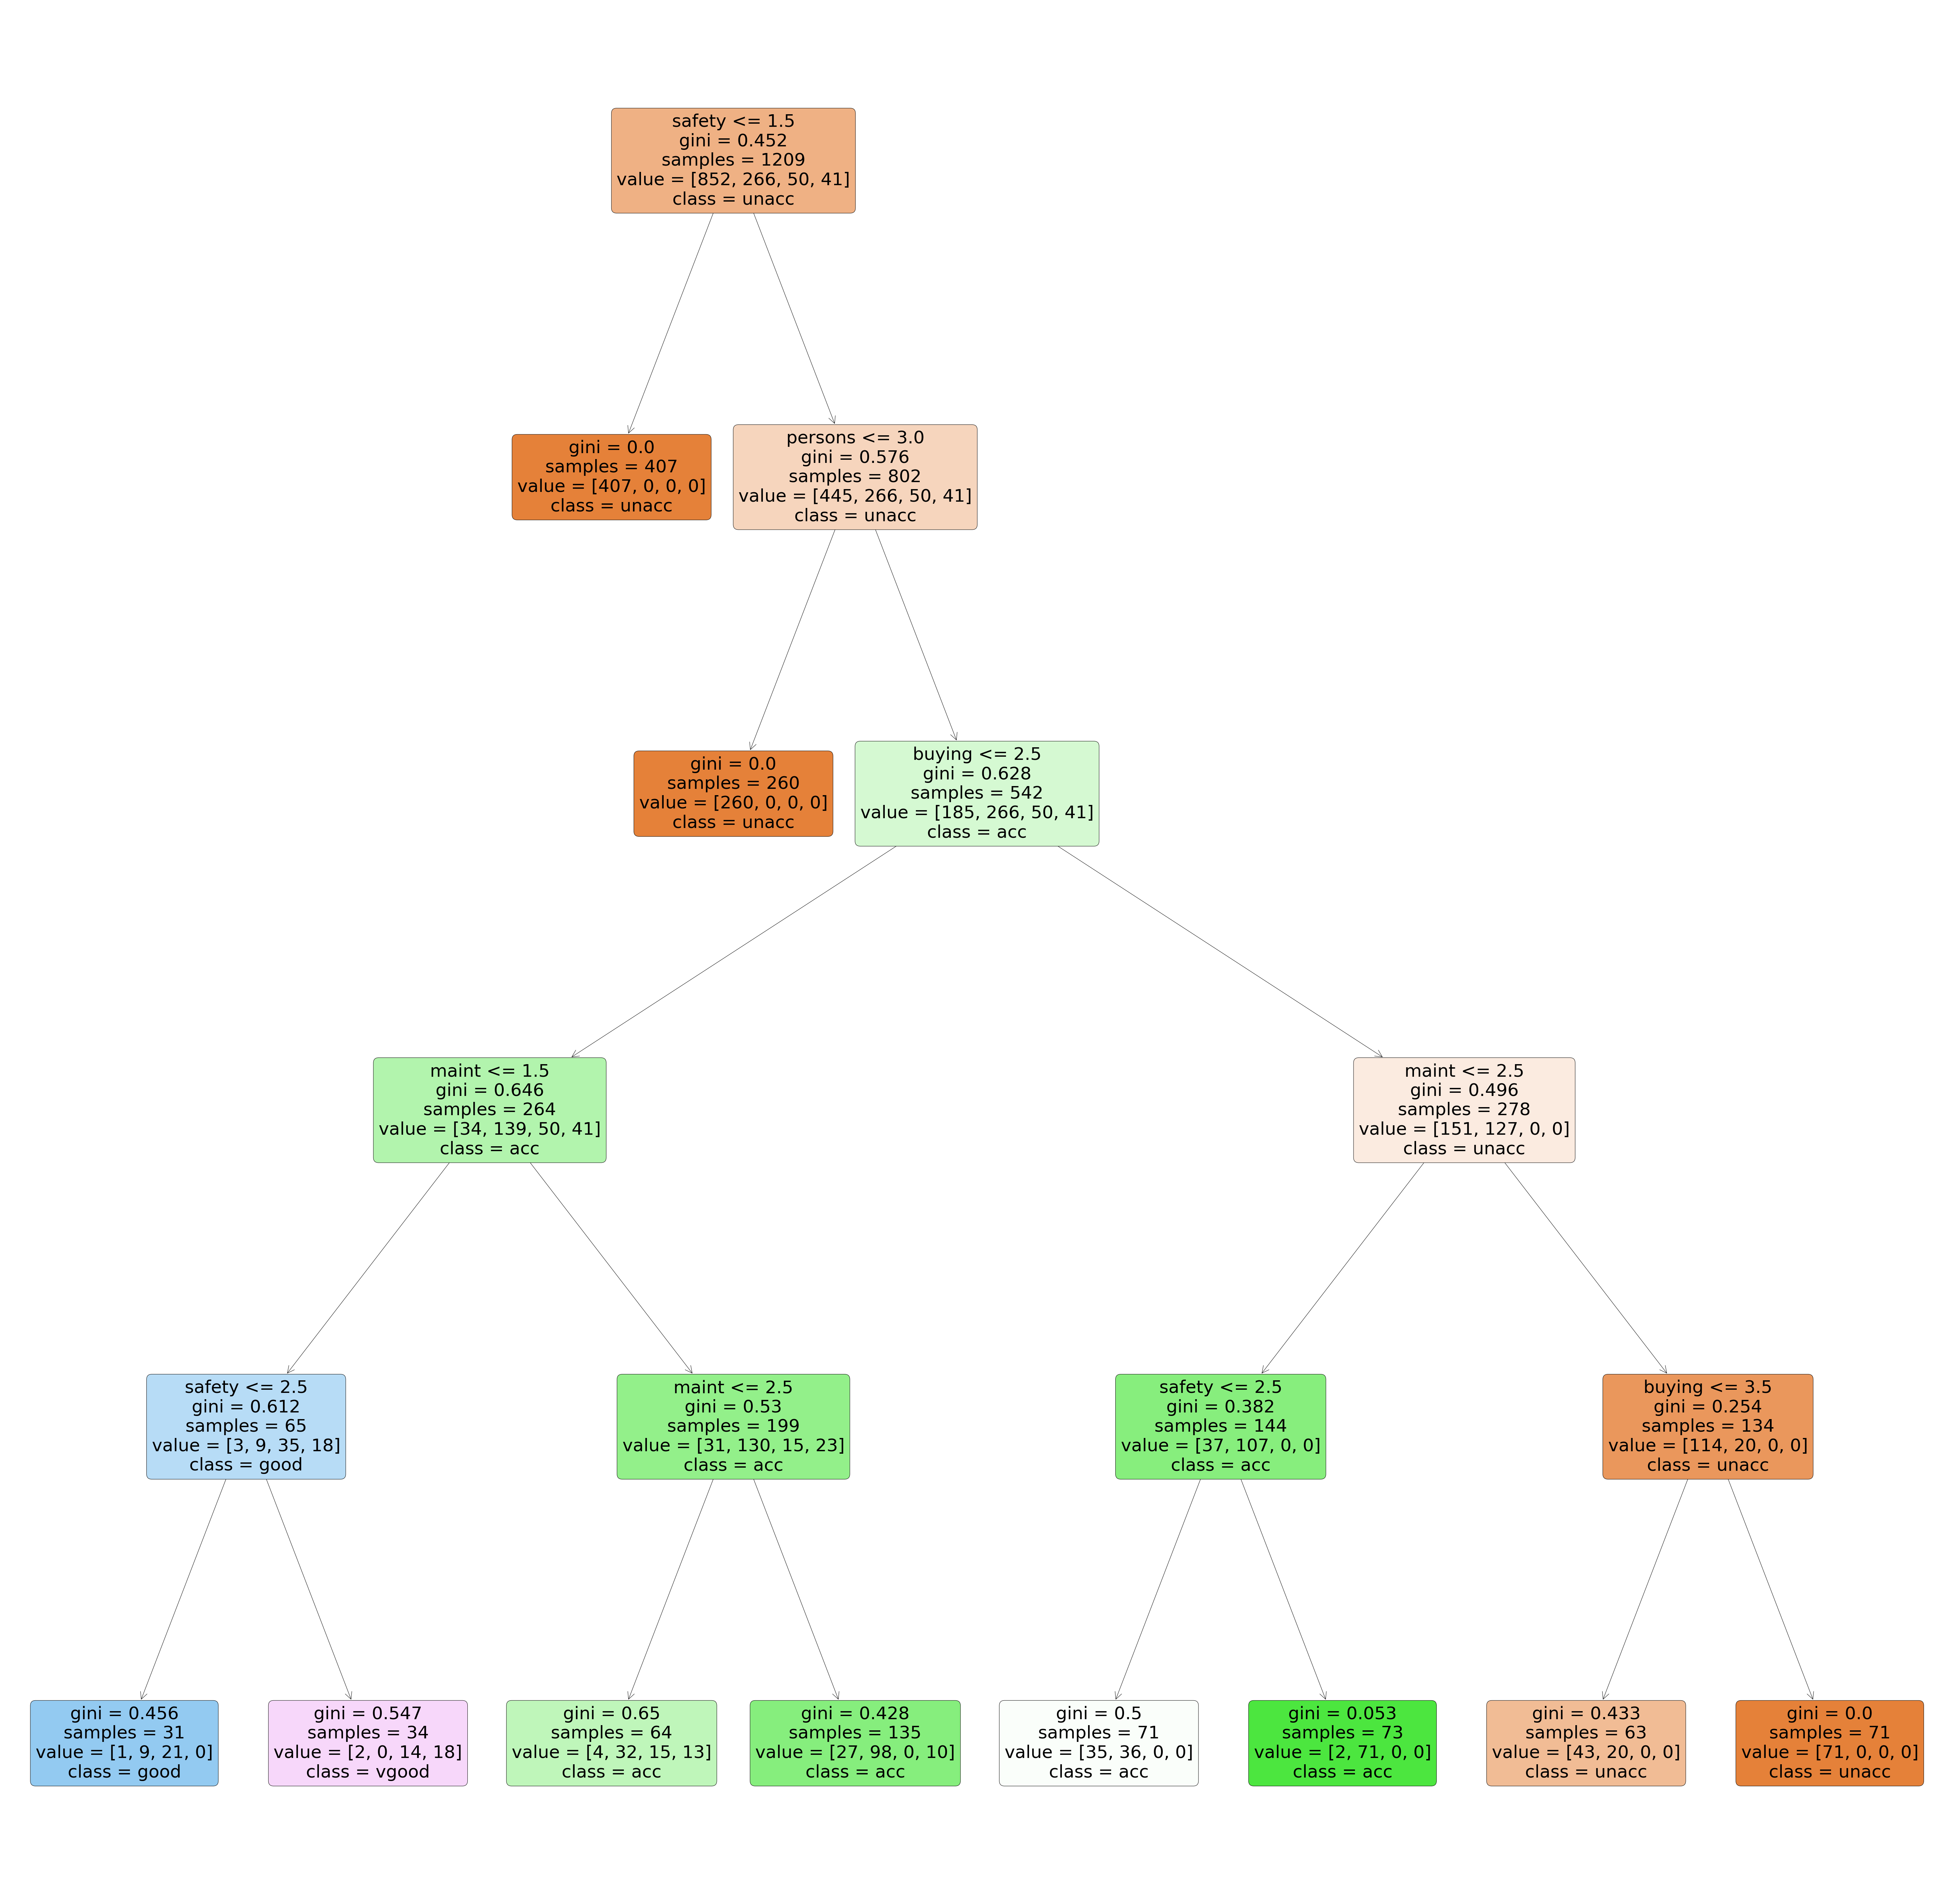

In [29]:
# plotting the decision tree
plt.figure(figsize=(100, 100))
plot_tree(dt_clf_2,
          filled=True,
          rounded=True,
          impurity=True,
          class_names=['unacc', 'acc', 'good', 'vgood'],
         feature_names=X.columns)

In [30]:
# Predicting the test set result  
y_pred_2 = dt_clf_2.predict(X_test)

In [31]:
# checking accuracy
(y_pred_2 == y_test).sum() / (len(y_test))

0.8458574181117534

In [32]:
dt_clf_3 = DecisionTreeClassifier(criterion ='entropy', max_depth = 7, splitter ='random', random_state = 42)
dt_clf_fit_3 = dt_clf_3.fit(X_train, y_train)
dt_clf_fit_3

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42,
                       splitter='random')

In [33]:
# Predicting the test set result  
y_pred_3 = dt_clf_3.predict(X_test)

In [34]:
# checking accuracy score
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred_3)
acc

0.9344894026974951

## GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth':[5,7,10,25], 'splitter':['best'], 'criterion':['gini']},
            {'max_depth':[5,7,10,25], 'splitter':['random'], 'criterion':['entropy']}]
grd = GridSearchCV(estimator = dt_clf_3, param_grid = parameters, scoring ='accuracy', cv = 5, n_jobs = -1)
grid_train = grd.fit(X_train,y_train) 
grid_train

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=7,
                                              random_state=42,
                                              splitter='random'),
             n_jobs=-1,
             param_grid=[{'criterion': ['gini'], 'max_depth': [5, 7, 10, 25],
                          'splitter': ['best']},
                         {'criterion': ['entropy'], 'max_depth': [5, 7, 10, 25],
                          'splitter': ['random']}],
             scoring='accuracy')